# Importing Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Loading Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [3]:
df = pd.read_csv("SeoulBikeData.csv", encoding="unicode_escape")
df.shape

(8760, 14)

In [4]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

# Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df.describe(include="all").T

count unique         top  freq         mean  \
Date                         8760    365  30/11/2018    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

## Checking For Any Null Values

In [8]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## Converting Date's data type
since the Date alone is not useful to us, as the machine cannot directly read it, we will break the Date down into day, month and year.

In [9]:
df["Date"]=pd.to_datetime(df["Date"],dayfirst=True)
df["Weekday"]=df["Date"].dt.day_name()
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year

df.drop("Date",axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Weekday                    8760 non-null   objec

In [11]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day Weekday  \
0           0.0            0.0  Winter  No Holiday             Yes  Friday   
1           0.0            0.0  Winter  No Holiday             Yes  Friday   
2           0.0            0.0  Winter  No Holiday             Yes  Friday   
3           0.0            0.0  Winter  No Holiday             Yes  Friday   
4           0.0            0.0  Winter  No Holiday             Yes  Friday   

   Day  Month  Year  
0    1     12  2017  
1    1     12  2017  
2    1     12  2017  
3    1     12  2017  
4    1     12  2017

# Exploratory Data Analysis (EDA)

- We shall generate a pair plot of the dataset.
- A pair plot is a grid of scatter plots where each numeric feature in the dataset is plotted against every other numeric feature.
- This helps visualize relationships and distributions within the data.

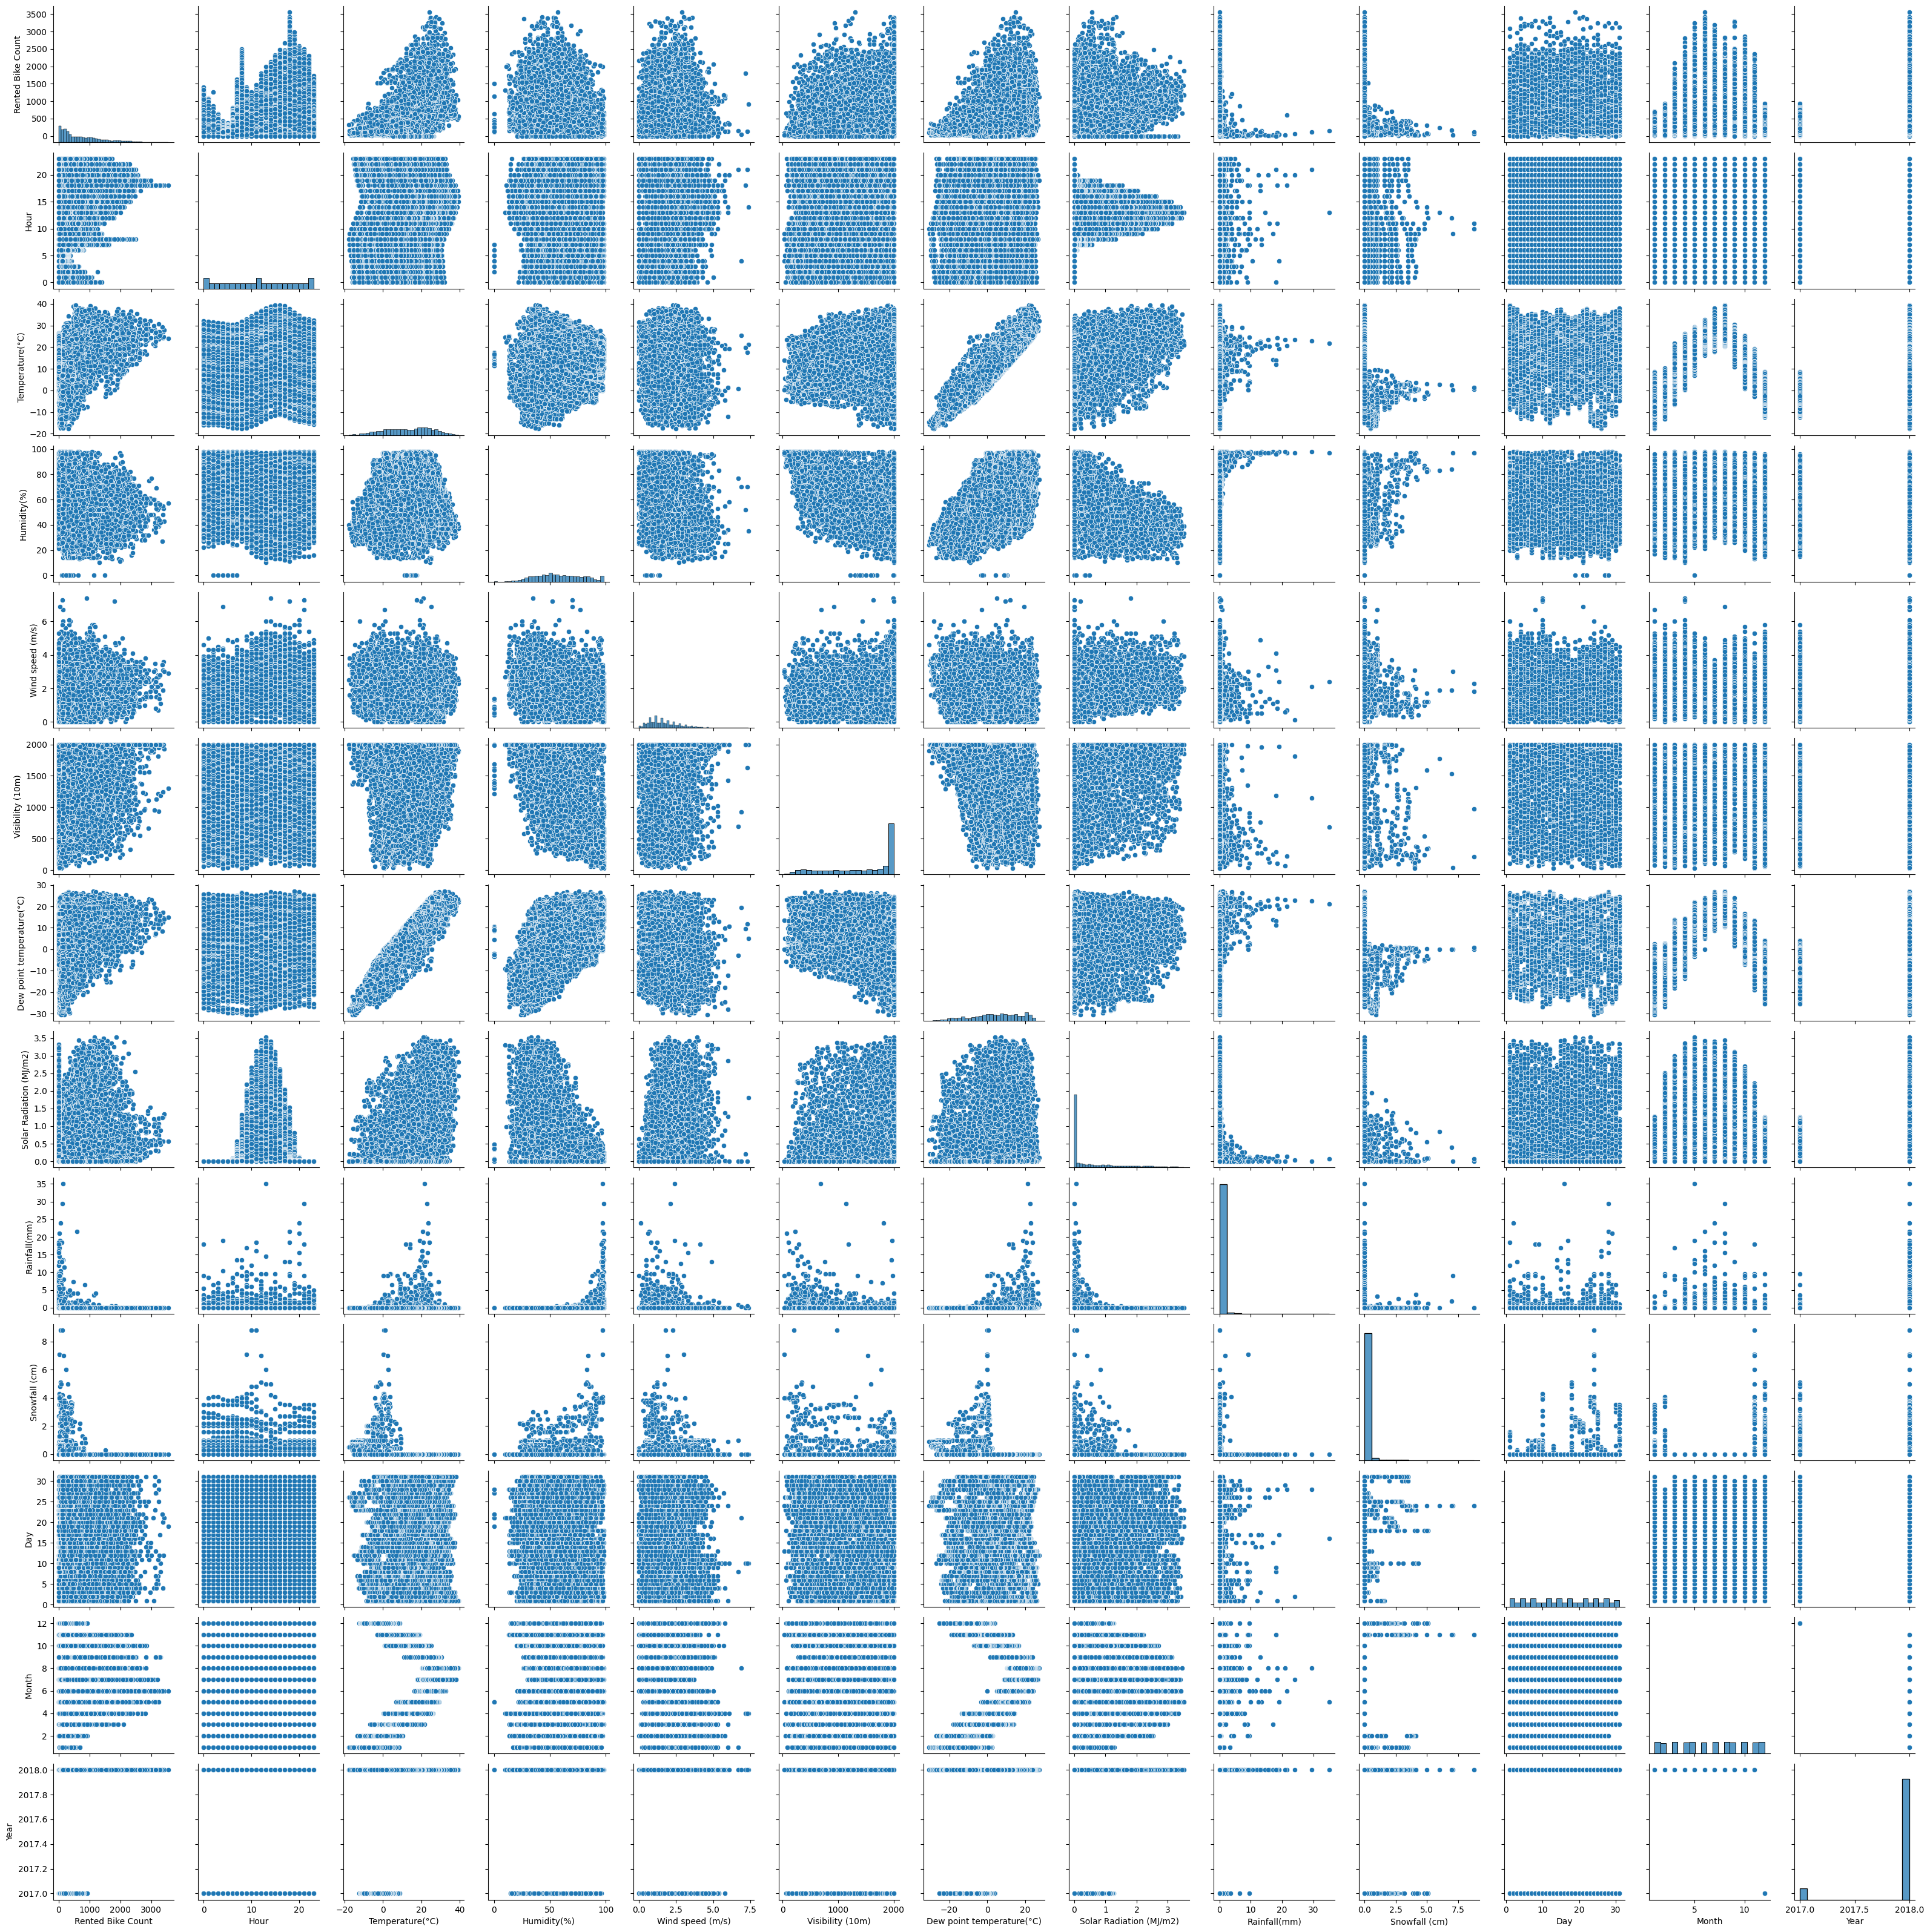

In [12]:
sns.pairplot(df)

Now we shall generate some bar plots to visualize the total `Rented Bike Count` across different time periods




<Axes: xlabel='Month', ylabel='Rented Bike Count'>

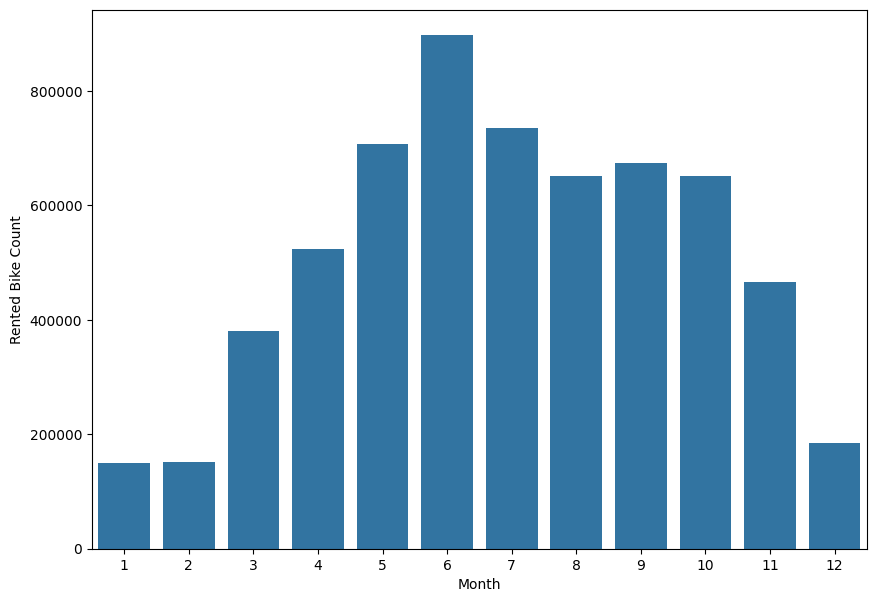

In [13]:
plt.figure(figsize=(10,7))
Month=df.groupby("Month").sum().reset_index()
sns.barplot(x="Month",y="Rented Bike Count",data=Month)

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

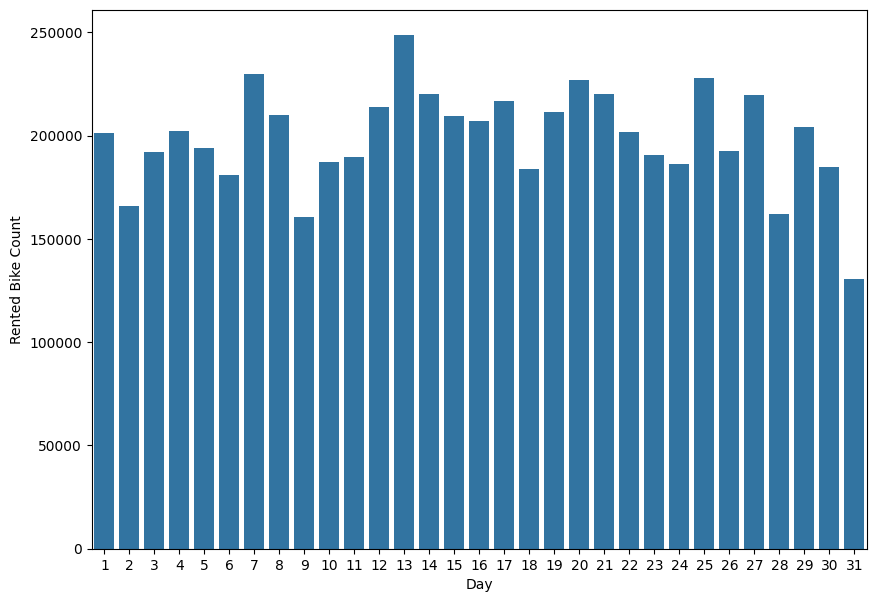

In [14]:
plt.figure(figsize=(10,7))
Month=df.groupby("Day").sum().reset_index()
sns.barplot(x="Day",y="Rented Bike Count",data=Month)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

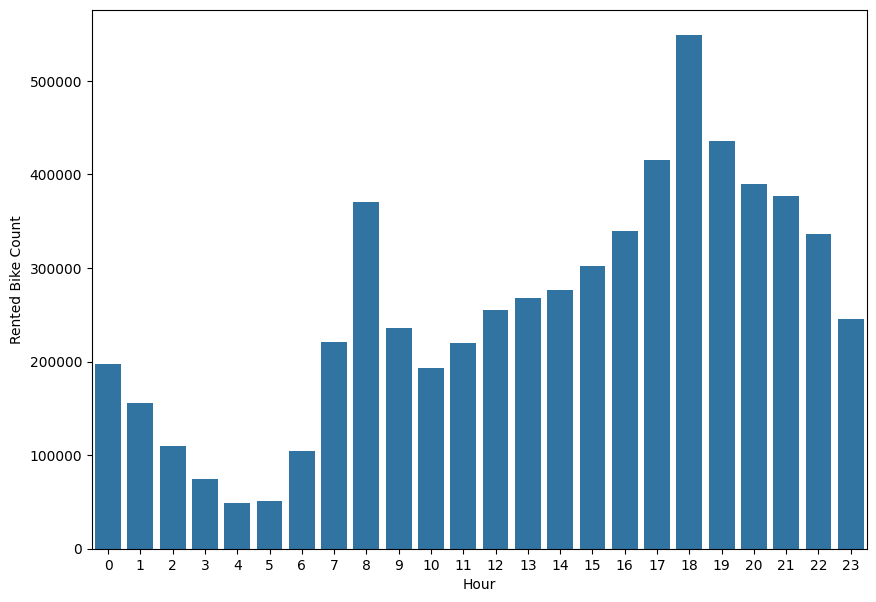

In [15]:
plt.figure(figsize=(10,7))
Month=df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour",y="Rented Bike Count",data=Month)

Lets generate two bar plots to visualize the total `Rented Bike Count` in relation to `Holiday` and `Seasons`.

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

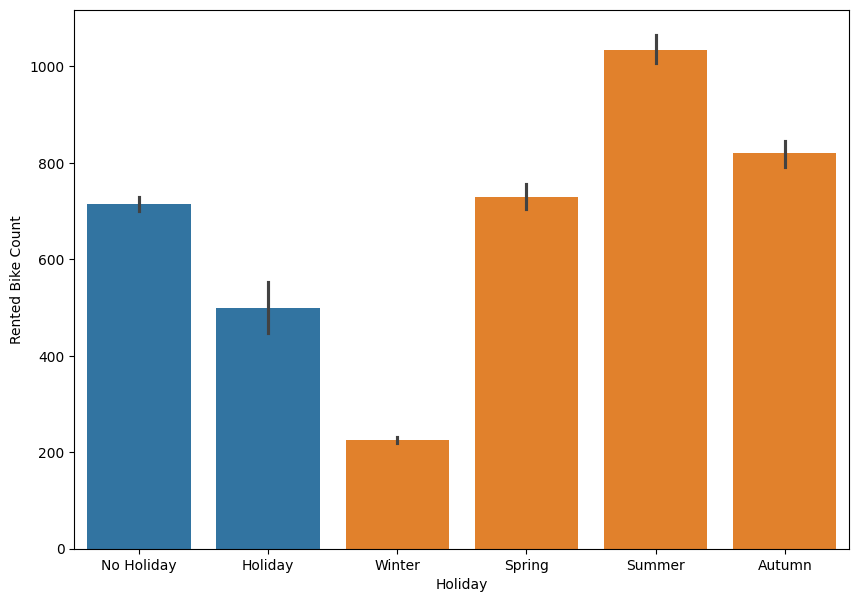

In [16]:
plt.figure(figsize=(10,7))

sns.barplot(x="Holiday",y="Rented Bike Count",data=df)
sns.barplot(x="Seasons",y="Rented Bike Count",data=df)

`Rented Bike` Count v/s `Rainfall(mm)`

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

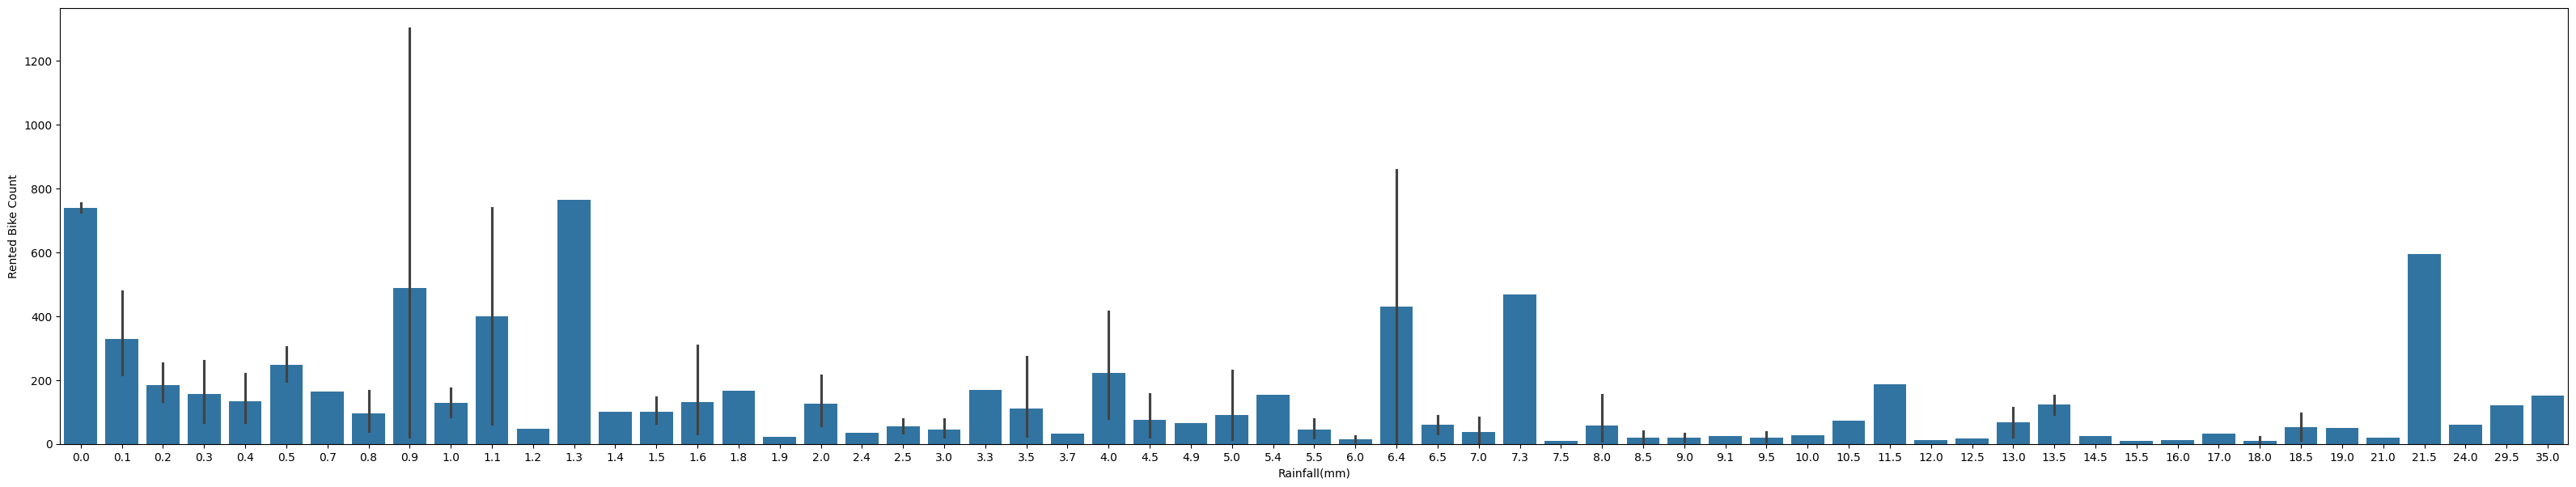

In [17]:
plt.figure(figsize=(40,7))
sns.barplot(x="Rainfall(mm)",y="Rented Bike Count",data=df)

This plot helps visualize the distribution of rented bike counts, showing how frequently different values or ranges of values appear in the data. It gives an idea of the central tendency, spread, and shape of the distribution.

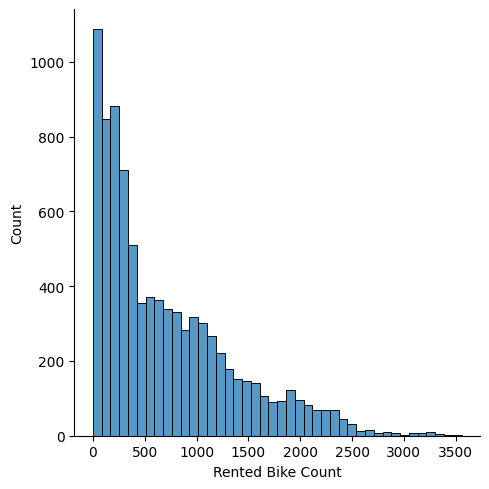

In [18]:
sns.displot(df["Rented Bike Count"])

- Taking square root to make the distribution of the data more symmetrical and closer to a normal distribution.
- This can be helpful for machine learning models that assume normally distributed data.

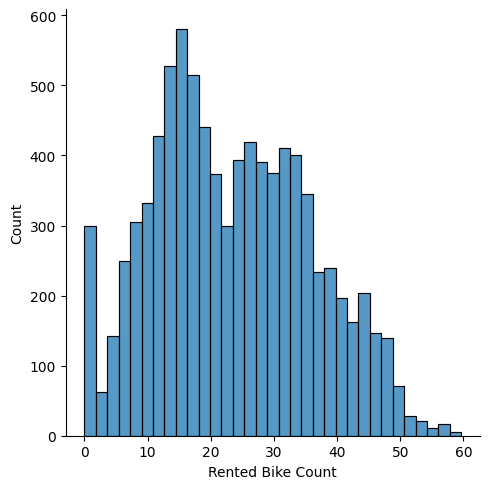

In [19]:
sns.displot(np.sqrt(df["Rented Bike Count"]))

Lets calculate the skewness for all the numeric columns in the DataFrame `df`.

In [20]:
df.skew(numeric_only=True)
#Positive is right skewed (tail on the right side) and negative is left skewed, near zero is bell shaped

Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
Day                           0.007522
Month                        -0.010458
Year                         -2.978262
dtype: float64

Checking for Multicollinearity

<Axes: >

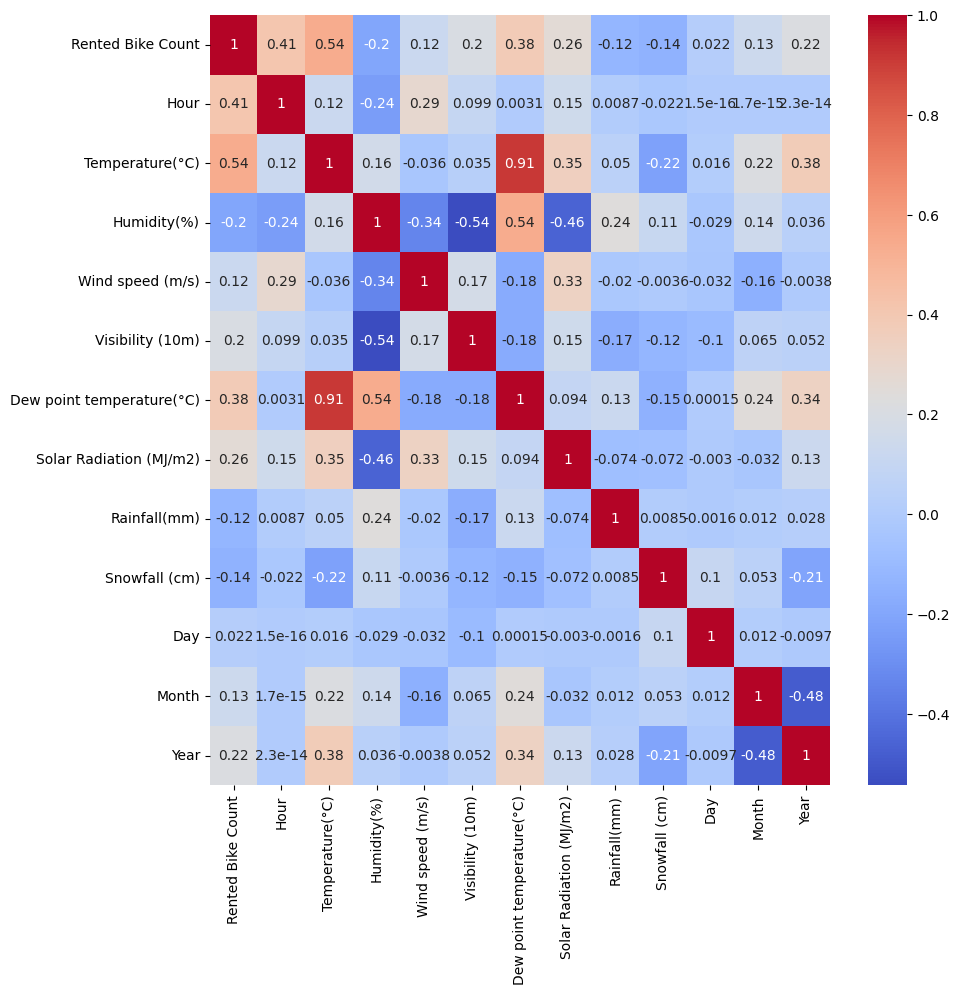

In [21]:
plt.figure(figsize=(10,10))
#Select only numeric columns
df_numeric=df.select_dtypes(include=['number'])
#Create a heatmap
sns.heatmap(df_numeric.corr(),annot=True,cmap="coolwarm")

- After seeing the heatmap we realise that the temperature and dew temperature and correlated
- We can simply drop one of these, which has less correlation

We shall now calculate **VIF** (Variance Inflation Factor)

---


Why Calculate **VIF**?

- VIF helps detect multicollinearity among features.
- A high VIF (typically above 5 or 10) suggests that a feature is highly
correlated with other features,which can inflate standard errors and lead to less reliable statistical estimates in a model.

In [22]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

"""variance_inflation_model is a function from statsmodels, which calculates the Variance Inflation Factor (VIF) for each feature in a dataset.
VIF helps detect multicollinearity (i.e., when features are highly correlated) in regression analysis,
which can lead to unstable and misleading regression coefficients."""

# Function to calculate VIF
def get_vif(df):
    vif = pd.DataFrame() #Creates a new empty data frame named vif, which will store the VIF values.
    vif["variables"] = df.columns #Sets the "variables" column of vif to list the names of columns in df, which are the features for which we’ll calculate VIF.
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])] #This line calculates VIF for each column in df
    return vif

# Exclude columns that shouldn't be included in VIF calculation
not_for_vif = ["Day", "Month", "Year", "Rented Bike Count"]

# Ensure only numeric columns are selected after excluding specific columns
df_vif = df[[i for i in df.describe().columns if i not in not_for_vif]].select_dtypes(include=['number'])

# Calculate VIF
vif_result = get_vif(df_vif)
print(vif_result)

                   variables        VIF
0                       Hour   4.418242
1            Temperature(°C)  33.385256
2                Humidity(%)   5.371996
3           Wind speed (m/s)   4.805364
4           Visibility (10m)   9.085977
5  Dew point temperature(°C)  17.126199
6    Solar Radiation (MJ/m2)   2.881590
7               Rainfall(mm)   1.081567
8              Snowfall (cm)   1.120833


In [23]:
df.drop(["Dew point temperature(°C)"],axis=1,inplace=True)

### Encoding

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [25]:
cat_features=["seasons","Holiday","Weekday","Functioning Day"]
df["Holiday"].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [26]:
df["Functioning Day"].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

Next we'll do some transformations


---


These transformations prepare the categorical data in Holiday,
Functioning Day, Seasons, and Weekday for use in machine learning models
by converting text categories into numerical representations, which most models require.

- **One-Hot Encoding**: This technique converts categorical variables with multiple categories into multiple binary columns, where each column represents a category.
Each row will have a 1 in the column for the category it belongs to and 0 in the others.


---


`drop_first=True`: This option drops the first category in each one-hot encoding transformation to avoid multicollinearity.
For example, if Seasons had categories `["Winter", "Spring", "Summer", "Fall"]`,
using `drop_first=True` would create three new columns instead of four,
encoding only ***Spring, Summer, and Fall***. If a row has `0`s in all these columns,
it indicates ***Winter*** (the dropped category).

In [27]:
df["Holiday"]=df["Holiday"].map({"No Holiday":0,"Holiday":1})
#These lines convert the categorical values in the Holiday and Functioning Day columns into binary numerical values.
df["Functioning Day"]=df["Functioning Day"].map({"No":0,"Yes":1})


df_seasons=pd.get_dummies(df["Seasons"],drop_first=True)
#Here, one-hot encoding is applied to the Seasons and Weekday columns to create new binary columns for each unique category within these columns.
df_weekday=pd.get_dummies(df["Weekday"],drop_first=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [29]:
df=pd.concat([df,df_seasons,df_weekday],axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [31]:
df.drop(["Seasons","Weekday"],axis=1,inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int32  
 12  Month                    8760 non-null   int32  
 13  Year                     8760 non-null   int32  
 14  Spring                  

Now our data is ready, we shall now split our data into two segments- `train` and `test`

# Splitting Data for training and testing


In [33]:
""" X contains all the columns in df except for "Rented Bike Count",
which is dropped because it is the target variable we want to predict.
y contains only the "Rented Bike Count" column,
which represents the values we’re trying to predict."""


X=df.drop("Rented Bike Count",axis=1)
y=df["Rented Bike Count"]


"""  The train_test_split function from sklearn.model_selection splits
the data into training and testing sets.
test_size=0.2 specifies that 20% of the data should be set aside for testing,
while 80% will be used for training.
random_state=7 ensures reproducibility by setting a fixed seed for the random split.
Using the same random state will produce the same split every time the code is run. """


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (7008, 22)
Shape of X_test: (1752, 22)
Shape of y_train: (7008,)
Shape of y_test: (1752,)


### Scaling
Standardizing the data often helps improve the performance and stability of machine learning models, especially those that are sensitive to the scale of the input data, such as regression algorithms, neural networks, and distance-based models (like KNN).

In [34]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [35]:
sc.mean_

array([1.14962900e+01, 1.28519121e+01, 5.82763984e+01, 1.72782534e+00,
       1.43980137e+03, 5.65810502e-01, 1.47103311e-01, 7.74543379e-02,
       4.99429224e-02, 9.66466895e-01, 1.56712329e+01, 6.54494863e+00,
       2.01791381e+03, 2.46718037e-01, 2.53139269e-01, 2.49857306e-01,
       1.43122146e-01, 1.44549087e-01, 1.40839041e-01, 1.42265982e-01,
       1.40410959e-01, 1.43550228e-01])

In [36]:
sc.scale_

array([6.92461759e+00, 1.19636529e+01, 2.04349313e+01, 1.04011533e+00,
       6.08045983e+02, 8.66029028e-01, 1.08480063e+00, 4.48223565e-01,
       2.17827057e-01, 1.80023987e-01, 8.78486629e+00, 3.45366098e+00,
       2.80640301e-01, 4.31101203e-01, 4.34810050e-01, 4.32930286e-01,
       3.50197369e-01, 3.51645629e-01, 3.47855438e-01, 3.49322734e-01,
       3.47412898e-01, 3.50633085e-01])

# Training ML Models

## Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression
"""  This line creates an instance of the LinearRegression class from sklearn.linear_model.

LinearRegression is a simple machine learning model that finds the best-fitting line through
the data by minimizing the sum of squared differences between the predicted and actual values.
This best-fit line is defined by the model’s weights (slopes) and intercepts,
which represent the relationship between the input features and the target variable. """

lr= LinearRegression()

"""  .fit(X_train, y_train) trains the linear regression model using the training data.
The method calculates the optimal weights (or coefficients) and intercept for the linear
relationship between X_train (the features) and y_train (the target variable).
During this step, the model learns how each feature in X_train affects the target variable
y_train. Once trained, this linear relationship can be used to predict values for new,
unseen data. """

lr.fit(X_train_scaled,y_train)

LinearRegression()

In [38]:
""" The predictions in y_pred are crucial for assessing the model’s performance.
By comparing y_pred with y_test (actual values),
you can evaluate how accurately the linear regression model is predicting the target variable,
often using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), or R-squared (R²). """

y_pred = lr.predict(X_test_scaled)

y_pred

array([603.3595371 , 361.9824077 , 445.01255537, ..., 490.11641888,
       103.46698716, 385.63707815])

### Model Evaluation

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE= mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)
MAE= mean_absolute_error(y_test, y_pred)
R2= r2_score(y_test, y_pred)

print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")
print(f"R2: {R2}")

""" The R² score of ~0.561 suggests the model explains about 56% of the variance
in the target variable, indicating room for improvement in predictive performance. """

MSE: 185160.2293121367
RMSE: 430.30248583076616
MAE: 322.08617586701337
R2: 0.560787053692131


' The R² score of ~0.561 suggests the model explains about 56% of the variance\nin the target variable, indicating room for improvement in predictive performance. '

In [40]:
#Creating a function, so that we can run it easily.
def get_metrics(y_true, y_pred, model_name):
    MSE= mean_squared_error(y_test, y_pred)
    RMSE= np.sqrt(MSE)
    MAE= mean_absolute_error(y_test, y_pred)
    R2= r2_score(y_test, y_pred)

    print(f"{model_name} : ['MSE':{round(MSE,3)}, 'RMSE':{round(RMSE,3)}, 'MAE':{round(MAE,3)}, 'R2':{round(R2,3)}]")

In [41]:
get_metrics(y_test, y_pred, "LinearRegression")

LinearRegression : ['MSE':185160.229, 'RMSE':430.302, 'MAE':322.086, 'R2':0.561]


## Train Multiple Models


In [42]:
# Models that NEED scaled data
rir = Ridge().fit(X_train_scaled, y_train)
y_pred_rir = rir.predict(X_test_scaled)

lar = Lasso().fit(X_train_scaled, y_train)
y_pred_lar = lar.predict(X_test_scaled)

# Polynomial Regression (also scale-sensitive)
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_r = LinearRegression().fit(X_train_poly, y_train)
y_pred_poly = poly_r.predict(X_test_poly)

svr = SVR().fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

knnr = KNeighborsRegressor().fit(X_train_scaled, y_train)
y_pred_knnr = knnr.predict(X_test_scaled)

# Decision Tree — scaling not needed
dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

# Random Forest — not scale-sensitive
rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

# XGBoost — not scale-sensitive
xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

In [43]:
get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_poly, "PolynomialFeatures")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_knnr, "KNN")
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_xgbr, "XGBRegressor")

Ridge : ['MSE':185147.68, 'RMSE':430.288, 'MAE':322.051, 'R2':0.561]
Lasso : ['MSE':185216.279, 'RMSE':430.368, 'MAE':321.388, 'R2':0.561]
PolynomialFeatures : ['MSE':119170.347, 'RMSE':345.211, 'MAE':236.781, 'R2':0.717]
SVR : ['MSE':324690.815, 'RMSE':569.816, 'MAE':389.69, 'R2':0.23]
KNN : ['MSE':100935.374, 'RMSE':317.703, 'MAE':202.212, 'R2':0.761]
DecisionTreeRegressor : ['MSE':57314.412, 'RMSE':239.404, 'MAE':133.731, 'R2':0.864]
RandomForestRegressor : ['MSE':30234.03, 'RMSE':173.879, 'MAE':102.679, 'R2':0.928]
XGBRegressor : ['MSE':23151.037, 'RMSE':152.155, 'MAE':96.899, 'R2':0.945]


# Visualising Model Predictions

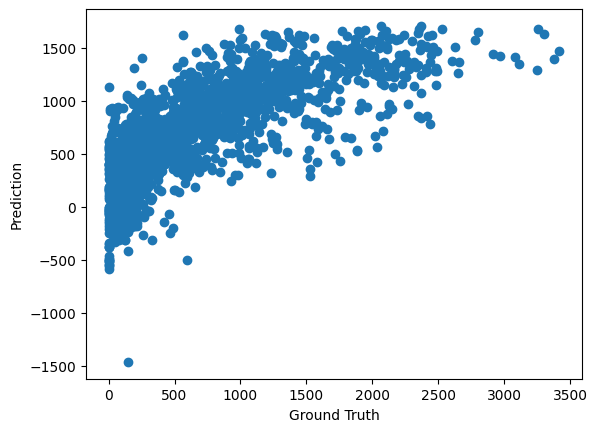

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

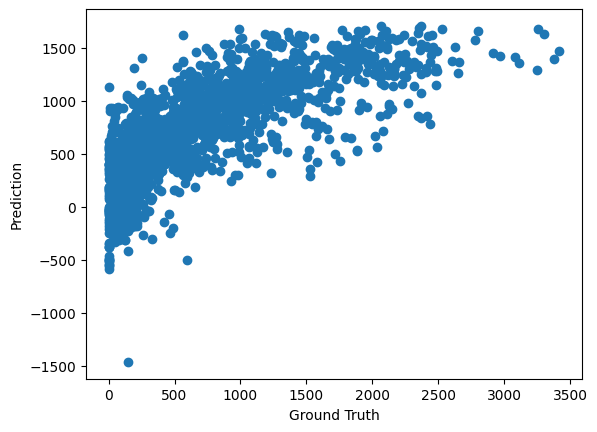

In [45]:
plt.scatter(y_test, y_pred_rir)
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

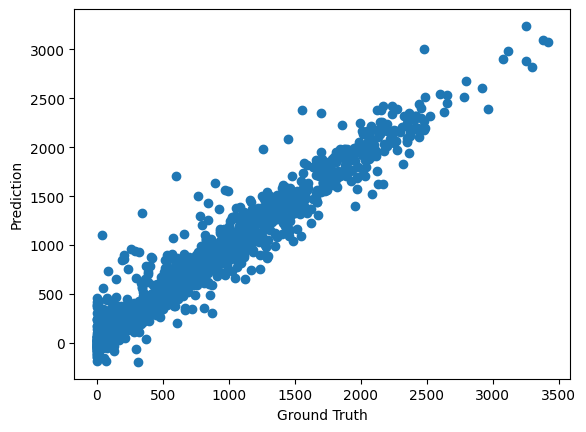

In [46]:
plt.scatter(y_test, y_pred_xgbr)
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

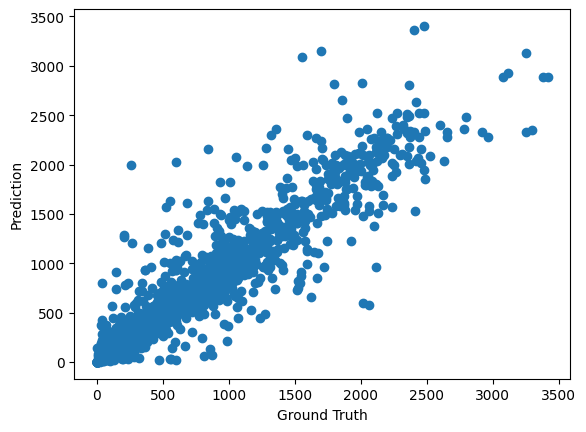

In [47]:
plt.scatter(y_test, y_pred_dtr)
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

# Hyperparamter Tuning

- Hyperparameter tuning is the process of finding the best set of hyperparameters for a machine learning model to optimize its performance.

- Think of hyperparameters as the "settings" of a machine learning algorithm that are not learned from the data itself, but are set before the training process begins. Examples include the number of trees in a Random Forest, the learning rate in a gradient boosting model, or the penalty parameter in a regression model.

- The goal of hyperparameter tuning is to find the combination of these settings that results in the best performance of your model on unseen data, often measured using metrics like accuracy, precision, recall, or R-squared.



### for Random Forest Regressor

In [48]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# Number of features to consider at every split
max_features = [None, 'sqrt']  # Use None instead of 'auto' for compatibility with newer versions

# Maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10, 120, num=12)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [49]:
import time
start_time =time.time()

rf=RandomForestRegressor()
#Random search of parameters, using 3 fold cross validation,
#search across 100 different combinations and use all available cores
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
#Fit the random search model
rf_random.fit(X_train, y_train)
y_pred_rf_random = rf_random.predict(X_test)

print("Time taken to train using randomized search :",time.time()-start_time)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Time taken to train using randomized search : 2262.371925830841


In [51]:
get_metrics(y_test, y_pred_rf_random, "RandomForestRegressor Fine Tuning")

RandomForestRegressor Fine Tuning : ['MSE':30045.741, 'RMSE':173.337, 'MAE':101.75, 'R2':0.929]


In [52]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 100,
 'bootstrap': True}

In [53]:
rf_tuned= RandomForestRegressor (n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf=1,
 max_features= None,
 max_depth= 100,
 bootstrap= True)


rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned=rf_tuned.predict(X_test)

get_metrics(y_test, y_pred_rf_tuned, "RandomForestRegressor with Best Parameters")

RandomForestRegressor with Best Parameters : ['MSE':30429.394, 'RMSE':174.44, 'MAE':102.342, 'R2':0.928]


### for XGBOOST Regressor

In [54]:
from sklearn.model_selection import RandomizedSearchCV

import time
start_time = time.time()

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}


xgbr = XGBRegressor(seed = 20)
rscv = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                          cv=5,
                         verbose=1)

rscv.fit(X_train, y_train)

y_pred_xgb_random = rscv.predict(X_test)

get_metrics(y_test, y_pred_xgb_random, "XGBRegressor With Best Parameters")

print("Time taken to training using randomize search : ", time.time()-start_time)

print("Best parameters:", rscv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGBRegressor With Best Parameters : ['MSE':20874.188, 'RMSE':144.479, 'MAE':84.721, 'R2':0.95]
Time taken to training using randomize search :  345.37135124206543
Best parameters: {'subsample': np.float64(0.8999999999999999), 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': np.float64(0.7999999999999999), 'colsample_bylevel': np.float64(0.8999999999999999)}


In [56]:
xgbr = XGBRegressor(subsample= 0.6,
n_estimators= 500,
max_depth= 5,
learning_rate= 0.1,
colsample_bytree= 0.7999999999999999,
colsample_bylevel= 0.8999999999999999,
                   seed=20)

xgbr.fit(X_train, y_train)

y_pred_tuned = xgbr.predict(X_test)

get_metrics(y_test, y_pred_tuned, "XGBRegressor With Best Parameters")

XGBRegressor With Best Parameters : ['MSE':23448.361, 'RMSE':153.129, 'MAE':97.008, 'R2':0.944]


# Saving the best ML Model

In [69]:
import pickle
import os
import joblib
# Create folder if not present
os.makedirs("models", exist_ok=True)

# Save best estimator from RandomizedSearchCV
model_path = os.path.join("models", "xgboost_best_model_r2_0_950.pkl")
pickle.dump(rscv.best_estimator_, open(model_path, "wb"))

# Save feature list
feature_list_path = os.path.join("models", "feature_order.pkl")
joblib.dump(X_train.columns.tolist(), feature_list_path)

print(f"Model saved to {model_path}")
print(f"Feature list saved to {feature_list_path}")

Model saved to models/xgboost_best_model_r2_0_950.pkl
Feature list saved to models/feature_order.pkl


# Visualising Results

In [63]:
def plot_model_results(y_true, y_pred, save=False, save_dir="plots", model_name="xgboost"):
    """
    Generates 3 diagnostic plots:
    1. Predicted vs Actual scatter
    2. Residual plot
    3. Line plot of predictions vs actuals (sample)

    Params:
        y_true (array-like): Ground truth values
        y_pred (array-like): Predicted values
        save (bool): Whether to save plots as images
        save_dir (str): Folder to save plots
        model_name (str): Used in filenames if saving
    """
    os.makedirs(save_dir, exist_ok=True)

    # 1. Scatter Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, color='royalblue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Rented Bike Count")
    plt.ylabel("Predicted Rented Bike Count")
    plt.title(f"{model_name} Predictions vs Actuals")
    plt.grid(True)
    if save:
        plt.savefig(f"{save_dir}/{model_name}_pred_vs_actual.png")
    plt.show()

    # 2. Residual Plot
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
    plt.axhline(0, linestyle='--', color='red')
    plt.xlabel("Predicted Rented Bike Count")
    plt.ylabel("Residuals")
    plt.title(f"{model_name} Residuals")
    plt.grid(True)
    if save:
        plt.savefig(f"{save_dir}/{model_name}_residuals.png")
    plt.show()

    # 3. Actual vs Predicted (first 100 points)
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(100), y_true[:100].values, label='Actual', marker='o')
    plt.plot(np.arange(100), y_pred[:100], label='Predicted', marker='x')
    plt.title(f"{model_name} Predictions vs Actuals (First 100 Points)")
    plt.xlabel("Sample Index")
    plt.ylabel("Rented Bike Count")
    plt.legend()
    plt.grid(True)
    if save:
        plt.savefig(f"{save_dir}/{model_name}_lineplot.png")
    plt.show()

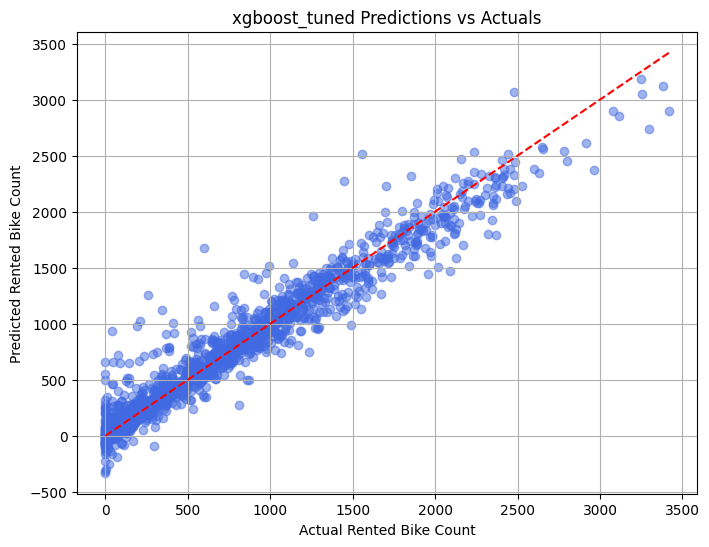

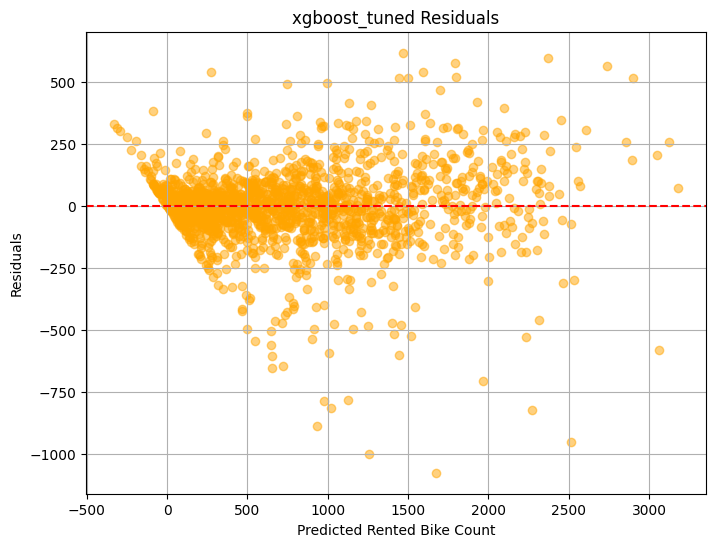

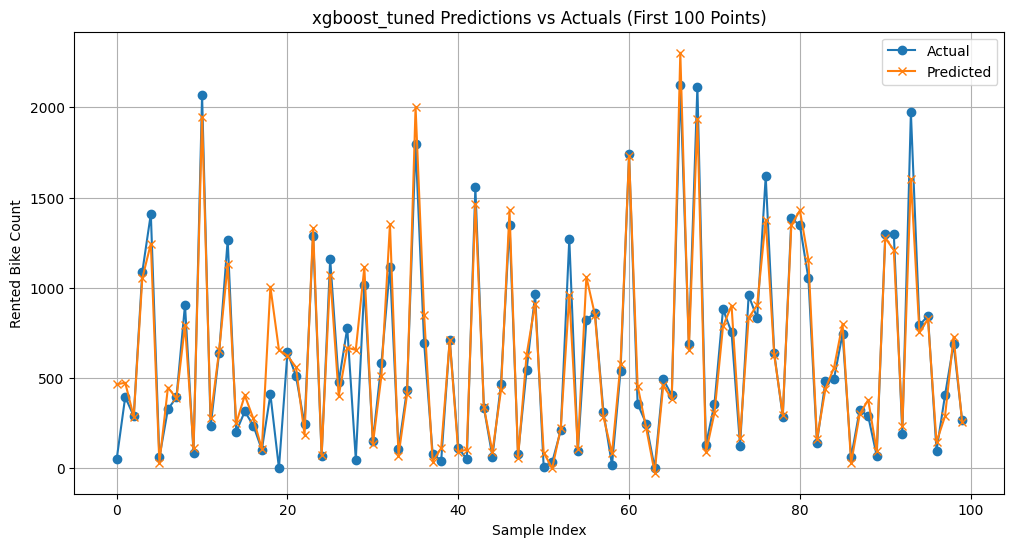

In [64]:
plot_model_results(y_test, y_pred_tuned, save=True, model_name="xgboost_tuned")

# Lets make an interface for us to enter data

In [65]:
!pip install gradio --quiet

*Code for a Simple Gradio Interface*


---


Remove the comments when you run this-

In [82]:
"""
import gradio as gr
import pandas as pd
import pickle
import joblib
import os

# Load trained model and feature list
model = pickle.load(open("models/xgboost_best_model_r2_0_950.pkl", "rb"))
feature_order = joblib.load(open("models/feature_order.pkl", "rb"))

# Define user-input features (must match what user sees in UI)
input_features = [
    "Hour", "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)",
    "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)",
    "Holiday", "Functioning Day",
    "Spring", "Summer", "Winter",
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday",
    "Day", "Month", "Year"
]

# Predict function
def predict_bike_demand(*inputs):
    user_input = dict(zip(input_features, inputs))
    df = pd.DataFrame([user_input])
    df = df.reindex(columns=feature_order, fill_value=0)  # Align with model

    prediction = model.predict(df)[0]
    return int(prediction)

# Gradio input controls
inputs = [
    gr.Slider(0, 23, value=9, label="Hour"),
    gr.Slider(-10, 40, value=15, label="Temperature (°C)"),
    gr.Slider(0, 100, value=60, label="Humidity (%)"),
    gr.Slider(0, 10, value=1.5, label="Wind Speed (m/s)"),
    gr.Slider(0, 2000, value=1000, label="Visibility (10m)"),
    gr.Slider(0, 3, value=0.2, label="Solar Radiation (MJ/m2)"),
    gr.Slider(0, 50, value=0.0, label="Rainfall (mm)"),
    gr.Slider(0, 10, value=0.0, label="Snowfall (cm)"),
    gr.Radio([0, 1], label="Is Holiday? (1=Yes, 0=No)"),
    gr.Radio([0, 1], label="Functioning Day? (1=Yes, 0=No)"),
    gr.Radio([0, 1], label="Is Spring?"),
    gr.Radio([0, 1], label="Is Summer?"),
    gr.Radio([0, 1], label="Is Winter?"),
    gr.Radio([0, 1], label="Is Monday?"),
    gr.Radio([0, 1], label="Is Tuesday?"),
    gr.Radio([0, 1], label="Is Wednesday?"),
    gr.Radio([0, 1], label="Is Thursday?"),
    gr.Radio([0, 1], label="Is Friday?"),
    gr.Radio([0, 1], label="Is Saturday?"),
    gr.Radio([0, 1], label="Is Sunday?"),
    gr.Slider(1, 31, value=15, label="Day"),
    gr.Slider(1, 12, value=7, label="Month"),
    gr.Slider(2017, 2018, value=2018, label="Year")
]

# Launch the Gradio app
gr.Interface(
    fn=predict_bike_demand,
    inputs=inputs,
    outputs=gr.Number(label="Predicted Bike Count"),
    title="🚲 Bike Demand Predictor",
    description="Enter weather, time, and calendar info to estimate hourly bike rental demand in Seoul."
).launch(debug=True)
"""

'\nimport gradio as gr\nimport pandas as pd\nimport pickle\nimport joblib\nimport os\n\n# Load trained model and feature list\nmodel = pickle.load(open("models/xgboost_best_model_r2_0_950.pkl", "rb"))\nfeature_order = joblib.load(open("models/feature_order.pkl", "rb"))\n\n# Define user-input features (must match what user sees in UI)\ninput_features = [\n    "Hour", "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)",\n    "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)",\n    "Holiday", "Functioning Day",\n    "Spring", "Summer", "Winter",\n    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday",\n    "Day", "Month", "Year"\n]\n\n# Predict function\ndef predict_bike_demand(*inputs):\n    user_input = dict(zip(input_features, inputs))\n    df = pd.DataFrame([user_input])\n    df = df.reindex(columns=feature_order, fill_value=0)  # Align with model\n\n    prediction = model.predict(df)[0]\n    return int(prediction)\n\n# Gradio inp

In [84]:
"""
import matplotlib.pyplot as plt

# Define a sample input dictionary
sample_input = {
    "Hour": 10,
    "Temperature(°C)": 20.0,
    "Humidity(%)": 55.0,
    "Wind speed (m/s)": 1.5,
    "Visibility (10m)": 1800,
    "Solar Radiation (MJ/m2)": 0.5,
    "Rainfall(mm)": 0.0,
    "Snowfall (cm)": 0.0,
    "Holiday": 0,
    "Functioning Day": 1,
    "Spring": 0,
    "Summer": 1,
    "Winter": 0,
    "Monday": 0,
    "Tuesday": 0,
    "Wednesday": 0,
    "Thursday": 1,
    "Friday": 0,
    "Saturday": 0,
    "Sunday": 0,
    "Day": 10,
    "Month": 7,
    "Year": 2018
}

# Convert to DataFrame and reorder columns
input_df = pd.DataFrame([sample_input])
input_df = input_df.reindex(columns=feature_order, fill_value=0)

# Predict
prediction = model.predict(input_df)[0]

# Create simple visual
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.6, f"Predicted Bike Count:\n{int(prediction)}", fontsize=20, ha='center')
plt.axis('off')
plt.title("XGBoost Prediction Example")
plt.savefig("gradio_sample_output.png", dpi=229)
plt.show()
"""

'\nimport matplotlib.pyplot as plt\n\n# Define a sample input dictionary\nsample_input = {\n    "Hour": 10,\n    "Temperature(°C)": 20.0,\n    "Humidity(%)": 55.0,\n    "Wind speed (m/s)": 1.5,\n    "Visibility (10m)": 1800,\n    "Solar Radiation (MJ/m2)": 0.5,\n    "Rainfall(mm)": 0.0,\n    "Snowfall (cm)": 0.0,\n    "Holiday": 0,\n    "Functioning Day": 1,\n    "Spring": 0,\n    "Summer": 1,\n    "Winter": 0,\n    "Monday": 0,\n    "Tuesday": 0,\n    "Wednesday": 0,\n    "Thursday": 1,\n    "Friday": 0,\n    "Saturday": 0,\n    "Sunday": 0,\n    "Day": 10,\n    "Month": 7,\n    "Year": 2018\n}\n\n# Convert to DataFrame and reorder columns\ninput_df = pd.DataFrame([sample_input])\ninput_df = input_df.reindex(columns=feature_order, fill_value=0)\n\n# Predict\nprediction = model.predict(input_df)[0]\n\n# Create simple visual\nplt.figure(figsize=(6, 4))\nplt.text(0.5, 0.6, f"Predicted Bike Count:\n{int(prediction)}", fontsize=20, ha=\'center\')\nplt.axis(\'off\')\nplt.title("XGBoost Pred